In [69]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_339524e45d8c4ca5b34d613d0c24c364 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='R*********B',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='NYC_311_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

In [70]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'R*********B',
    'IBM_API_KEY_ID': 'R*********B',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'NYC_311_Dataset.csv'
}

This notebook answers the Question 2 - What Areas Should the Agency Focus On?

In [71]:
!pip install missingno

Requirement not upgraded as not directly required: missingno in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: scipy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: matplotlib in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: seaborn in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: six>=1.10 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from matplotlib->missingno)
Requirement not upgraded as not directly required: python-dateutil>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from matplotlib->missingno)
Requirement not upgraded 

In [72]:
!pip install TextBlob

Requirement not upgraded as not directly required: TextBlob in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: nltk>=3.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from TextBlob)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from nltk>=3.1->TextBlob)


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from IPython.display import display

%matplotlib inline

## Reading Data

## Droping unnecessary features and cleaning dataset

In [74]:
# Using domain knowledge on the dataset, I decided to drop the following columns: address_type, closed_date, created_date, latitude, location_type, longitude, resolution_description, and status.
df.drop(columns = ['address_type','closed_date','created_date','latitude','location_type','longitude','resolution_description','status'], inplace=True)

In [75]:
# New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one.
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [76]:
# Are there any variables with missing values?
df.isnull().sum()

borough                 0
city                80566
complaint_type          0
incident_address    52658
incident_zip        80900
street_name         52658
unique_key              0
dtype: int64

In [77]:
# Drop all missing values from NYC dataset
df.dropna(axis=0, inplace=True)

In [78]:
df.isnull().sum()

borough             0
city                0
complaint_type      0
incident_address    0
incident_zip        0
street_name         0
unique_key          0
dtype: int64

In [79]:
df.shape

(5482737, 7)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482737 entries, 0 to 5563636
Data columns (total 7 columns):
borough             object
city                object
complaint_type      object
incident_address    object
incident_zip        float64
street_name         object
unique_key          int64
dtypes: float64(1), int64(1), object(5)
memory usage: 334.6+ MB


In [81]:
df.head()

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
0,BROOKLYN,BROOKLYN,DOOR/WINDOW,397 1 STREET,11215.0,1 STREET,31929828
1,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0,BROADWAY,31929829
2,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0,BROADWAY,31929830
3,BROOKLYN,BROOKLYN,DOOR/WINDOW,1555 NOSTRAND AVENUE,11226.0,NOSTRAND AVENUE,31929831
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0,MULFORD AVENUE,31929832


In [82]:
df['complaint_type'].value_counts()

HEAT/HOT WATER          1929008
PLUMBING                 673145
GENERAL CONSTRUCTION     498752
UNSANITARY CONDITION     392000
PAINT - PLASTER          359742
PAINT/PLASTER            312414
ELECTRIC                 289199
NONCONST                 259999
DOOR/WINDOW              180406
WATER LEAK               168675
GENERAL                  132501
FLOORING/STAIRS          123293
APPLIANCE                102043
SAFETY                    44366
OUTSIDE BUILDING           6532
ELEVATOR                   5586
CONSTRUCTION               5044
STRUCTURAL                   16
VACANT APARTMENT              8
AGENCY                        8
Name: complaint_type, dtype: int64

In [83]:
df['borough'].value_counts()

BROOKLYN         1590804
BRONX            1457952
MANHATTAN         951843
Unspecified       819798
QUEENS            582722
STATEN ISLAND      79618
Name: borough, dtype: int64

In [84]:
df['incident_zip'].value_counts()

11226.0    199542
10467.0    159840
10458.0    156902
10453.0    149777
10468.0    135961
10452.0    134344
10457.0    132547
10456.0    121501
10031.0    114266
11225.0    112298
11213.0    110855
10032.0    102323
11207.0    101979
11233.0     99301
11212.0     99001
11221.0     96105
10460.0     88614
10472.0     87015
10040.0     84329
11216.0     82921
11203.0     81857
11208.0     81246
10033.0     75837
10462.0     73094
10463.0     73037
10034.0     66686
10459.0     66102
10466.0     63726
11230.0     59908
11237.0     57991
            ...  
10282.0       501
10007.0       491
10006.0       411
10005.0       380
10280.0       327
10004.0       296
11697.0       266
11001.0       256
11040.0       100
10069.0        64
11109.0        60
10129.0        40
10162.0        14
11005.0        12
10020.0         4
10803.0         4
10158.0         3
10103.0         3
11430.0         2
11241.0         2
10112.0         2
10041.0         2
11243.0         1
10271.0         1
10279.0   

In [85]:
df['street_name'].value_counts()

GRAND CONCOURSE                   85279
BROADWAY                          60939
OCEAN AVENUE                      51193
ST NICHOLAS AVENUE                38320
MORRIS AVENUE                     37656
AMSTERDAM AVENUE                  34796
WALTON AVENUE                     31220
LINDEN BOULEVARD                  28064
EASTERN PARKWAY                   26088
CRESTON AVENUE                    25137
RIVERSIDE DRIVE                   23398
NOSTRAND AVENUE                   23112
DR M L KING JR BOULEVARD          22596
NEW YORK AVENUE                   21975
OCEAN PARKWAY                     21657
DECATUR AVENUE                    21048
SEDGWICK AVENUE                   21046
SHERIDAN AVENUE                   20541
DAVIDSON AVENUE                   20340
BOYNTON AVENUE                    19418
BEDFORD AVENUE                    19178
VALENTINE AVENUE                  19144
ST JOHNS PLACE                    18705
AUDUBON AVENUE                    18151
SHERMAN AVENUE                    17397


## Basic selection with & operator

In [86]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BROOKLYN')]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
165,BROOKLYN,BROOKLYN,HEAT/HOT WATER,435 GRAND AVENUE,11238.0,GRAND AVENUE,31930540
170,BROOKLYN,BROOKLYN,HEAT/HOT WATER,273 LEE AVENUE,11206.0,LEE AVENUE,31930549
175,BROOKLYN,BROOKLYN,HEAT/HOT WATER,271 MARTENSE STREET,11226.0,MARTENSE STREET,31930563
176,BROOKLYN,BROOKLYN,HEAT/HOT WATER,49 CLARKSON AVENUE,11226.0,CLARKSON AVENUE,31930564
178,BROOKLYN,BROOKLYN,HEAT/HOT WATER,652 55 STREET,11220.0,55 STREET,31930580
179,BROOKLYN,BROOKLYN,HEAT/HOT WATER,273 HALSEY STREET,11216.0,HALSEY STREET,31930583
182,BROOKLYN,BROOKLYN,HEAT/HOT WATER,65 PARK AVENUE,11205.0,PARK AVENUE,31930590
183,BROOKLYN,BROOKLYN,HEAT/HOT WATER,523 KNICKERBOCKER AVENUE,11221.0,KNICKERBOCKER AVENUE,31930591
185,BROOKLYN,BROOKLYN,HEAT/HOT WATER,263 STOCKHOLM STREET,11237.0,STOCKHOLM STREET,31930593
186,BROOKLYN,BROOKLYN,HEAT/HOT WATER,163 MADISON STREET,11216.0,MADISON STREET,31930594


In [87]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BROOKLYN')].count()

borough             509960
city                509960
complaint_type      509960
incident_address    509960
incident_zip        509960
street_name         509960
unique_key          509960
dtype: int64

In [88]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
13,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0,TOWNSEND AVENUE,31930038
14,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0,PROSPECT AVENUE,31930075
189,BRONX,BRONX,HEAT/HOT WATER,2995 BOTANICAL SQUARE,10458.0,BOTANICAL SQUARE,31930602
192,BRONX,BRONX,HEAT/HOT WATER,2351 GRAND CONCOURSE,10468.0,GRAND CONCOURSE,31930609
205,BRONX,BRONX,HEAT/HOT WATER,750 GRAND CONCOURSE,10451.0,GRAND CONCOURSE,31930628
221,BRONX,BRONX,HEAT/HOT WATER,888 GRAND CONCOURSE,10451.0,GRAND CONCOURSE,31930648
231,BRONX,BRONX,HEAT/HOT WATER,883 EAST 180 STREET,10460.0,EAST 180 STREET,31930658
232,BRONX,BRONX,HEAT/HOT WATER,1834 PHELAN PLACE,10453.0,PHELAN PLACE,31930659
475,BRONX,BRONX,HEAT/HOT WATER,930 SHERIDAN AVENUE,10451.0,SHERIDAN AVENUE,31931474
476,BRONX,BRONX,HEAT/HOT WATER,888 GRAND CONCOURSE,10451.0,GRAND CONCOURSE,31931482


In [89]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')].count()

borough             532325
city                532325
complaint_type      532325
incident_address    532325
incident_zip        532325
street_name         532325
unique_key          532325
dtype: int64

In [90]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'MANHATTAN')]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
174,MANHATTAN,NEW YORK,HEAT/HOT WATER,3580 BROADWAY,10031.0,BROADWAY,31930562
184,MANHATTAN,NEW YORK,HEAT/HOT WATER,631 HUDSON STREET,10014.0,HUDSON STREET,31930592
187,MANHATTAN,NEW YORK,HEAT/HOT WATER,489 BROADWAY,10012.0,BROADWAY,31930595
191,MANHATTAN,NEW YORK,HEAT/HOT WATER,551 WEST 157 STREET,10032.0,WEST 157 STREET,31930608
200,MANHATTAN,NEW YORK,HEAT/HOT WATER,135 ELDRIDGE STREET,10002.0,ELDRIDGE STREET,31930621
201,MANHATTAN,NEW YORK,HEAT/HOT WATER,2 WEST 129 STREET,10027.0,WEST 129 STREET,31930622
216,MANHATTAN,NEW YORK,HEAT/HOT WATER,140 EAST 28 STREET,10016.0,EAST 28 STREET,31930643
217,MANHATTAN,NEW YORK,HEAT/HOT WATER,3851 BROADWAY,10032.0,BROADWAY,31930644
220,MANHATTAN,NEW YORK,HEAT/HOT WATER,183 EAST 3 STREET,10009.0,EAST 3 STREET,31930647
454,MANHATTAN,NEW YORK,HEAT/HOT WATER,502 WEST 142 STREET,10031.0,WEST 142 STREET,31931427


In [91]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'MANHATTAN')].count()

borough             373869
city                373869
complaint_type      373869
incident_address    373869
incident_zip        373869
street_name         373869
unique_key          373869
dtype: int64

In [92]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'STATEN ISLAND')]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
169,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,85 HOLLAND AVENUE,10303.0,HOLLAND AVENUE,31930548
180,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,256 CORSON AVENUE,10301.0,CORSON AVENUE,31930585
2168,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,1660 RICHMOND TERRACE,10310.0,RICHMOND TERRACE,31936843
2177,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,138 ST PAULS AVENUE,10301.0,ST PAULS AVENUE,31936852
2724,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,174 GRANDVIEW AVENUE,10303.0,GRANDVIEW AVENUE,31938684
2816,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,30 EBBITTS STREET,10306.0,EBBITTS STREET,31939170
3319,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,142 HENDRICKS AVENUE,10301.0,HENDRICKS AVENUE,31940981
3719,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,320 VANDERBILT AVENUE,10304.0,VANDERBILT AVENUE,31942627
3731,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,44 BRADLEY AVENUE,10314.0,BRADLEY AVENUE,31942664
3773,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,228 BENZIGER AVENUE,10301.0,BENZIGER AVENUE,31942719


In [93]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'STATEN ISLAND')].count()

borough             16330
city                16330
complaint_type      16330
incident_address    16330
incident_zip        16330
street_name         16330
unique_key          16330
dtype: int64

In [94]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'QUEENS')]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
181,QUEENS,Far Rockaway,HEAT/HOT WATER,1314 CENTRAL AVENUE,11691.0,CENTRAL AVENUE,31930586
188,QUEENS,Jamaica,HEAT/HOT WATER,109-12 176 STREET,11433.0,176 STREET,31930596
193,QUEENS,Jackson Heights,HEAT/HOT WATER,34-18 91 STREET,11372.0,91 STREET,31930610
197,QUEENS,Corona,HEAT/HOT WATER,97-05 HORACE HARDING EXPRESSWAY,11368.0,HORACE HARDING EXPRESSWAY,31930615
208,QUEENS,South Richmond Hill,HEAT/HOT WATER,97-38 110 STREET,11419.0,110 STREET,31930631
209,QUEENS,Astoria,HEAT/HOT WATER,20-72A STEINWAY STREET,11105.0,STEINWAY STREET,31930635
218,QUEENS,South Richmond Hill,HEAT/HOT WATER,97-38 110 STREET,11419.0,110 STREET,31930645
222,QUEENS,Corona,HEAT/HOT WATER,97-05 HORACE HARDING EXPRESSWAY,11368.0,HORACE HARDING EXPRESSWAY,31930649
483,QUEENS,Corona,HEAT/HOT WATER,97-05 HORACE HARDING EXPRESSWAY,11368.0,HORACE HARDING EXPRESSWAY,31931498
487,QUEENS,Saint Albans,HEAT/HOT WATER,113-17 205 STREET,11412.0,205 STREET,31931503


In [95]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'QUEENS')].count()

borough             213879
city                213879
complaint_type      213879
incident_address    213879
incident_zip        213879
street_name         213879
unique_key          213879
dtype: int64

## Grouping all borough in one dataset

In [96]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby('borough')
stats.count()

,city,complaint_type,incident_address,incident_zip,street_name,unique_key
borough,,,,,,
BRONX,532325,532325,532325,532325,532325,532325
BROOKLYN,509960,509960,509960,509960,509960,509960
MANHATTAN,373869,373869,373869,373869,373869,373869
QUEENS,213879,213879,213879,213879,213879,213879
STATEN ISLAND,16330,16330,16330,16330,16330,16330
Unspecified,282645,282645,282645,282645,282645,282645


# Concluding Remark n1 : BRONX has the highest HEAT/HOT WATER complaints, followed very closely by BROOKLYN

In [97]:
df[df['complaint_type'] == 'HEAT/HOT WATER'].count()

borough             1929008
city                1929008
complaint_type      1929008
incident_address    1929008
incident_zip        1929008
street_name         1929008
unique_key          1929008
dtype: int64

In [98]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby('incident_zip')
stats.count()

,borough,city,complaint_type,incident_address,street_name,unique_key
incident_zip,,,,,,
10001.0,3858,3858,3858,3858,3858,3858
10002.0,13055,13055,13055,13055,13055,13055
10003.0,9943,9943,9943,9943,9943,9943
10004.0,143,143,143,143,143,143
10005.0,162,162,162,162,162,162
10006.0,183,183,183,183,183,183
10007.0,183,183,183,183,183,183
10009.0,13862,13862,13862,13862,13862,13862
10010.0,3793,3793,3793,3793,3793,3793


In [99]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby(['borough','incident_zip','incident_address'])
stats.count()

city  complaint_type  \
borough     incident_zip incident_address                             
BRONX       10451.0      1000 GRAND CONCOURSE    91              91   
                         1020 GRAND CONCOURSE     4               4   
                         105 EAST  158 STREET     1               1   
                         109 EAST  153 STREET   497             497   
                         109 EAST 153 STREET    338             338   
                         110 EAST  138 STREET     1               1   
                         121 EAST  150 STREET     1               1   
                         143 EAST  149 STREET    42              42   
                         143 EAST 149 STREET      5               5   
                         146 EAST 150 STREET      1               1   
                         148 EAST  150 STREET     6               6   
                         148 EAST 150 STREET      1               1   
                         149 EAST 149 STREET     10              10   
                         153 EAST  149 STREET     3               3   
                         158 GERARD AVENUE        1               1   
                         169 EAST 159 STREET      1               1   
                         170 GERARD AVENUE        1               1   
                         170 WALTON AVENUE        1               1   
                         175 EAST  151 STREET   100             100   
                         175 EAST 151 STREET    144             144   
                         180 EAST  162 STREET    24              24   
                         180 EAST  163 STREET    41              41   
                         180 EAST 162 STREET     57              57   
                         180 EAST 163 STREET     34              34   
                         181 EAST  161 STREET    45              45   
                         181 EAST 161 STREET     46              46   
                         185 EAST  159 STREET    18              18   
                         185 EAST  162 STREET    22              22   
                         185 EAST  163 STREET     2               2   
                         185 EAST 159 STREET     22              22   
...                                             ...             ...   
Unspecified 11694.0      182 BEACH 113 STREET     3               3   
                         187 BEACH 115 STREET     5               5   
                         188 BEACH 115 STREET     1               1   
                         190 BEACH 114 STREET     2               2   
                         191 BEACH 102 LANE       1               1   
                         192 BEACH 115 STREET     4               4   
                         198 BEACH 119 STREET     3               3   
                         209 BEACH 125 STREET     2               2   
                         212 BEACH 102 STREET     1               1   
                         214 BEACH 98 STREET      2               2   
                         216 BEACH 100 STREET     1               1   
                         218 BEACH 98 STREET      1               1   
                         220 BEACH 124 STREET     2               2   
                         224 BEACH 100 STREET     7               7   
                         228 BEACH 99 STREET      2               2   
                         229 BEACH 108 STREET     1               1   
                         229 BEACH 98 STREET      1               1   
                         233 BEACH 100 STREET     7               7   
                         237 BEACH 122 STREET     1               1   
                         241 BEACH 118 STREET     3               3   
                         319 BEACH 98 STREET      7               7   
                         320 BEACH 100 STREET    45              45   
                         340 BEACH 102 STREET     1               1   
                         413 BEACH 129 STREET     1               1   


## Using borough, incident zip and incident address to find out and calculate each complaint type which is displayed in unique_key

In [100]:
df['borough'].value_counts()

BROOKLYN         1590804
BRONX            1457952
MANHATTAN         951843
Unspecified       819798
QUEENS            582722
STATEN ISLAND      79618
Name: borough, dtype: int64

In [101]:
df.borough.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'QUEENS',
       'Unspecified'], dtype=object)

In [102]:
df[df.borough == "Unspecified"]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
273643,Unspecified,BROOKLYN,PLUMBING,84 ROSS STREET,11211.0,ROSS STREET,15634790
273645,Unspecified,BRONX,HEAT/HOT WATER,776 MACE AVENUE,10467.0,MACE AVENUE,15634798
273652,Unspecified,BRONX,NONCONST,1201 FINDLAY AVENUE,10456.0,FINDLAY AVENUE,15634840
273655,Unspecified,BRONX,PLUMBING,2825 CLAFLIN AVENUE,10468.0,CLAFLIN AVENUE,15634882
273679,Unspecified,BROOKLYN,GENERAL CONSTRUCTION,413 EAST 98 STREET,11212.0,EAST 98 STREET,15634979
273710,Unspecified,BROOKLYN,ELECTRIC,1159 EASTERN PARKWAY,11213.0,EASTERN PARKWAY,15635122
273737,Unspecified,BROOKLYN,GENERAL CONSTRUCTION,321 44 STREET,11220.0,44 STREET,15635225
273743,Unspecified,BROOKLYN,GENERAL CONSTRUCTION,2913 FOSTER AVENUE,11210.0,FOSTER AVENUE,15635269
273795,Unspecified,BROOKLYN,HEAT/HOT WATER,526 44 STREET,11220.0,44 STREET,15635569
273798,Unspecified,BROOKLYN,HEAT/HOT WATER,1305 LINCOLN PLACE,11213.0,LINCOLN PLACE,15635592


In [103]:
# Dropping Unspecified
df = df[~df.borough.str.contains("Unspecified")]

In [104]:
df[df.borough == "Unspecified"]

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key


In [105]:
# Saving the modified file for later use
df.to_csv('nyc311_modified1.csv', index=False)  


df.borough.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'QUEENS'], dtype=object)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


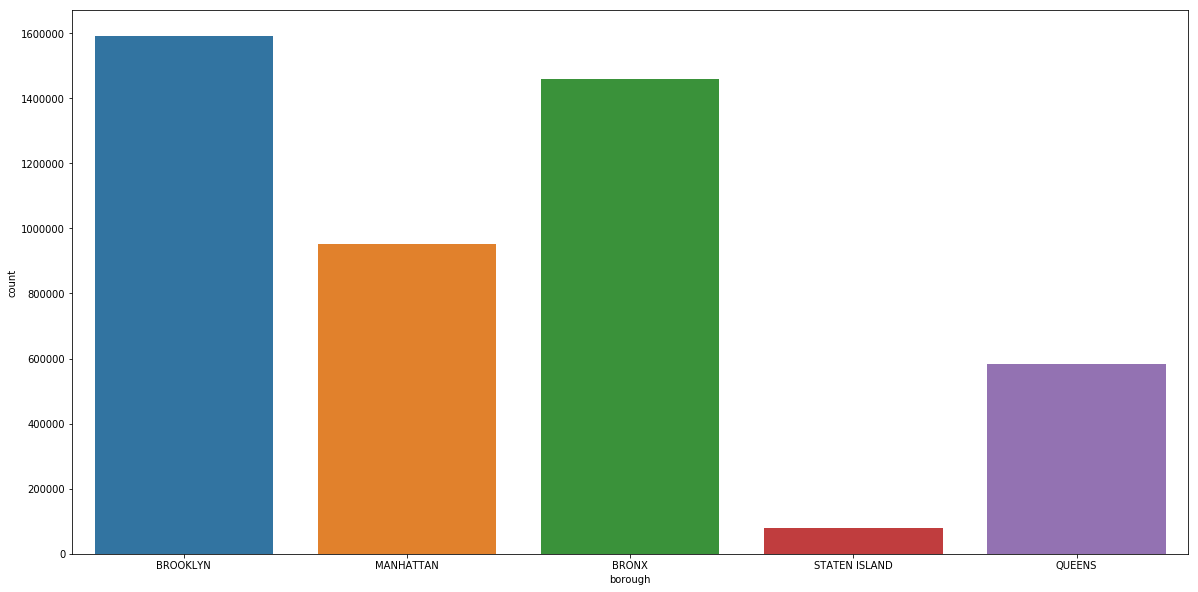

In [106]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.borough);

In [107]:
grp = df.groupby(['complaint_type','borough', 'incident_zip', 'incident_address'], as_index=True)

In [108]:
grp.count()

city  \
complaint_type borough       incident_zip incident_address                  
AGENCY         BRONX         10453.0      1890 ANDREWS AVENUE SOUTH     1   
                             10459.0      1038 LOWELL STREET            1   
                             10468.0      2297 SEDGWICK AVENUE          1   
               BROOKLYN      11204.0      1725 61 STREET                1   
               MANHATTAN     10031.0      454 WEST  146 STREET          1   
                             10039.0      203 WEST  148 STREET          1   
               QUEENS        11435.0      109-29 SUTPHIN BOULEVARD      1   
                             11692.0      141 BEACH 56 PLACE            1   
APPLIANCE      BRONX         10451.0      1000 GRAND CONCOURSE          2   
                                          109 EAST  153 STREET          2   
                                          109 EAST 153 STREET           3   
                                          143 EAST  149 STREET          6   
                                          143 EAST 149 STREET           4   
                                          149 EAST  149 STREET          4   
                                          175 EAST  151 STREET          2   
                                          175 EAST 151 STREET           4   
                                          180 EAST  162 STREET          1   
                                          180 EAST  163 STREET         10   
                                          180 EAST 163 STREET           1   
                                          185 EAST  162 STREET          5   
                                          185 EAST 162 STREET           2   
                                          214 EAST  163 STREET         13   
                                          214 EAST 163 STREET           5   
                                          225 EAST  149 STREET          4   
                                          225 EAST 163 STREET           1   
                                          235 EAST  149 STREET          2   
                                          235 EAST 149 STREET           2   
                                          237 EAST  163 STREET          1   
                                          245 EAST  149 STREET          2   
                                          245 EAST 149 STREET           1   
...                                                                   ...   
WATER LEAK     STATEN ISLAND 10314.0      49 COUNTRY DRIVE WEST         1   
                                          49 RICHARD LANE               1   
                                          5 BOONE STREET                1   
                                          5 COMMERCE STREET             1   
                                          5 WINDHAM LOOP                2   
                                          50 PLYMOUTH ROAD              1   
                                          51 BOONE STREET               1   
                                          52 NEHRING AVENUE             1   
                                          526 TRAVIS AVENUE             1   
                                          527 WILLOWBROOK ROAD          3   
                                          57 CARPENTER AVENUE           1   
                                          57 DARCEY AVENUE              1   
                                          583 STEWART AVENUE            3   
                                          60 WATCHOGUE ROAD             1   
                                          635 GOETHALS ROAD NORTH       2   
                                          67 STONE LANE                 1   
                                          7 LEONA STREET                1   
                                          7 LIVINGSTON AVENUE           2   
                                          72 DRAPER PLACE               1   
                                          74 CROFT PLACE         

In [109]:
# Assigning to a new dataframe
pd.DataFrame = grp.count()  
newdf = pd.DataFrame
newdf

city  \
complaint_type borough       incident_zip incident_address                  
AGENCY         BRONX         10453.0      1890 ANDREWS AVENUE SOUTH     1   
                             10459.0      1038 LOWELL STREET            1   
                             10468.0      2297 SEDGWICK AVENUE          1   
               BROOKLYN      11204.0      1725 61 STREET                1   
               MANHATTAN     10031.0      454 WEST  146 STREET          1   
                             10039.0      203 WEST  148 STREET          1   
               QUEENS        11435.0      109-29 SUTPHIN BOULEVARD      1   
                             11692.0      141 BEACH 56 PLACE            1   
APPLIANCE      BRONX         10451.0      1000 GRAND CONCOURSE          2   
                                          109 EAST  153 STREET          2   
                                          109 EAST 153 STREET           3   
                                          143 EAST  149 STREET          6   
                                          143 EAST 149 STREET           4   
                                          149 EAST  149 STREET          4   
                                          175 EAST  151 STREET          2   
                                          175 EAST 151 STREET           4   
                                          180 EAST  162 STREET          1   
                                          180 EAST  163 STREET         10   
                                          180 EAST 163 STREET           1   
                                          185 EAST  162 STREET          5   
                                          185 EAST 162 STREET           2   
                                          214 EAST  163 STREET         13   
                                          214 EAST 163 STREET           5   
                                          225 EAST  149 STREET          4   
                                          225 EAST 163 STREET           1   
                                          235 EAST  149 STREET          2   
                                          235 EAST 149 STREET           2   
                                          237 EAST  163 STREET          1   
                                          245 EAST  149 STREET          2   
                                          245 EAST 149 STREET           1   
...                                                                   ...   
WATER LEAK     STATEN ISLAND 10314.0      49 COUNTRY DRIVE WEST         1   
                                          49 RICHARD LANE               1   
                                          5 BOONE STREET                1   
                                          5 COMMERCE STREET             1   
                                          5 WINDHAM LOOP                2   
                                          50 PLYMOUTH ROAD              1   
                                          51 BOONE STREET               1   
                                          52 NEHRING AVENUE             1   
                                          526 TRAVIS AVENUE             1   
                                          527 WILLOWBROOK ROAD          3   
                                          57 CARPENTER AVENUE           1   
                                          57 DARCEY AVENUE              1   
                                          583 STEWART AVENUE            3   
                                          60 WATCHOGUE ROAD             1   
                                          635 GOETHALS ROAD NORTH       2   
                                          67 STONE LANE                 1   
                                          7 LEONA STREET                1   
                                          7 LIVINGSTON AVENUE           2   
                                          72 DRAPER PLACE               1   
                                          74 CROFT PLACE         

In [110]:
# Selecting highest complaint
newdf.xs('HEAT/HOT WATER')

city  street_name  \
borough       incident_zip incident_address                             
BRONX         10451.0      1000 GRAND CONCOURSE       91           91   
                           1020 GRAND CONCOURSE        4            4   
                           105 EAST  158 STREET        1            1   
                           109 EAST  153 STREET      497          497   
                           109 EAST 153 STREET       338          338   
                           110 EAST  138 STREET        1            1   
                           121 EAST  150 STREET        1            1   
                           143 EAST  149 STREET       42           42   
                           143 EAST 149 STREET         5            5   
                           146 EAST 150 STREET         1            1   
                           148 EAST  150 STREET        6            6   
                           148 EAST 150 STREET         1            1   
                           149 EAST 149 STREET        10           10   
                           153 EAST  149 STREET        3            3   
                           158 GERARD AVENUE           1            1   
                           169 EAST 159 STREET         1            1   
                           170 GERARD AVENUE           1            1   
                           170 WALTON AVENUE           1            1   
                           175 EAST  151 STREET      100          100   
                           175 EAST 151 STREET       144          144   
                           180 EAST  162 STREET       24           24   
                           180 EAST  163 STREET       41           41   
                           180 EAST 162 STREET        57           57   
                           180 EAST 163 STREET        34           34   
                           181 EAST  161 STREET       45           45   
                           181 EAST 161 STREET        46           46   
                           185 EAST  159 STREET       18           18   
                           185 EAST  162 STREET       22           22   
                           185 EAST  163 STREET        2            2   
                           185 EAST 159 STREET        22           22   
...                                                  ...          ...   
STATEN ISLAND 10314.0      80 RICHMOND HILL ROAD      40           40   
                           80 TOWERS LANE              1            1   
                           800 MANOR ROAD              5            5   
                           801 WILLOW ROAD WEST        2            2   
                           81 FRASER STREET            1            1   
                           82 MULBERRY AVENUE          3            3   
                           827 GOETHALS ROAD NORTH     1            1   
                           85 COMSTOCK AVENUE          1            1   
                           86 MADISON AVENUE           1            1   
                           873 MANOR ROAD              4            4   
                           88 SATURN LANE              1            1   
                           887 MANOR ROAD              2            2   
                           9 DONNA COURT               2            2   
                           9 GADSEN PLACE             12           12   
                           9 JULES DRIVE               8            8   
                           90 GARY COURT               2            2   
                           90 RICHMOND HILL ROAD      65           65   
                           91 LIVINGSTON AVENUE        4            4   
                           91 REGIS DRIVE              2            2   
                           910 WESTWOOD AVENUE         1            1   
                           92 DREYER AVENUE            1            1   
                           93 DAWSON COURT             1            1   
                           97 PORTAGE

In [111]:
# Saving the modified file for later use
df.to_csv('nyc311_modified2.csv', index=False)  

In [112]:
grpb = df.groupby(['borough', 'incident_zip'], as_index=True)

In [113]:
grpb.count()

city  complaint_type  incident_address  \
borough       incident_zip                                             
BRONX         10451.0        49968           49968             49968   
              10452.0       114937          114937            114937   
              10453.0       127030          127030            127030   
              10454.0        27291           27291             27291   
              10455.0        37672           37672             37672   
              10456.0       103637          103637            103637   
              10457.0       111271          111271            111271   
              10458.0       134238          134238            134238   
              10459.0        55519           55519             55519   
              10460.0        74089           74089             74089   
              10461.0        28303           28303             28303   
              10462.0        63854           63854             63854   
              10463.0        54196           54196             54196   
              10464.0          867             867               867   
              10465.0         5460            5460              5460   
              10466.0        55440           55440             55440   
              10467.0       136814          136814            136814   
              10468.0       114913          114913            114913   
              10469.0        26809           26809             26809   
              10470.0        16169           16169             16169   
              10471.0         5722            5722              5722   
              10472.0        74266           74266             74266   
              10473.0        19608           19608             19608   
              10474.0        16199           16199             16199   
              10475.0         3676            3676              3676   
              10803.0            4               4                 4   
BROOKLYN      11201.0         9414            9414              9414   
              11203.0        68260           68260             68260   
              11204.0        24936           24936             24936   
              11205.0        14782           14782             14782   
...                            ...             ...               ...   
QUEENS        11421.0         9782            9782              9782   
              11422.0         5722            5722              5722   
              11423.0         9273            9273              9273   
              11426.0          820             820               820   
              11427.0         4226            4226              4226   
              11428.0         2975            2975              2975   
              11429.0         5491            5491              5491   
              11430.0            2               2                 2   
              11432.0        21411           21411             21411   
              11433.0        15639           15639             15639   
              11434.0        16393           16393             16393   
              11435.0        17027           17027             17027   
              11436.0         4967            4967              4967   
              11691.0        37621           37621             37621   
              11692.0         9591            9591              9591   
              11693.0         3928            3928              3928   
              11694.0         8629            8629              8629   
              11697.0          226             226               226   
STATEN ISLAND 10301.0        18680           18680             18680   
              10302.0         7259            7259              7259   
              10303.0         9078            9078              9078   
              10304.0        18266           18266             18266   
              10305.0         4779            4779              4779  

In [114]:
# Assigning to a new dataframe
pd.DataFrame = grpb.count() 
borough = pd.DataFrame
borough

city  complaint_type  incident_address  \
borough       incident_zip                                             
BRONX         10451.0        49968           49968             49968   
              10452.0       114937          114937            114937   
              10453.0       127030          127030            127030   
              10454.0        27291           27291             27291   
              10455.0        37672           37672             37672   
              10456.0       103637          103637            103637   
              10457.0       111271          111271            111271   
              10458.0       134238          134238            134238   
              10459.0        55519           55519             55519   
              10460.0        74089           74089             74089   
              10461.0        28303           28303             28303   
              10462.0        63854           63854             63854   
              10463.0        54196           54196             54196   
              10464.0          867             867               867   
              10465.0         5460            5460              5460   
              10466.0        55440           55440             55440   
              10467.0       136814          136814            136814   
              10468.0       114913          114913            114913   
              10469.0        26809           26809             26809   
              10470.0        16169           16169             16169   
              10471.0         5722            5722              5722   
              10472.0        74266           74266             74266   
              10473.0        19608           19608             19608   
              10474.0        16199           16199             16199   
              10475.0         3676            3676              3676   
              10803.0            4               4                 4   
BROOKLYN      11201.0         9414            9414              9414   
              11203.0        68260           68260             68260   
              11204.0        24936           24936             24936   
              11205.0        14782           14782             14782   
...                            ...             ...               ...   
QUEENS        11421.0         9782            9782              9782   
              11422.0         5722            5722              5722   
              11423.0         9273            9273              9273   
              11426.0          820             820               820   
              11427.0         4226            4226              4226   
              11428.0         2975            2975              2975   
              11429.0         5491            5491              5491   
              11430.0            2               2                 2   
              11432.0        21411           21411             21411   
              11433.0        15639           15639             15639   
              11434.0        16393           16393             16393   
              11435.0        17027           17027             17027   
              11436.0         4967            4967              4967   
              11691.0        37621           37621             37621   
              11692.0         9591            9591              9591   
              11693.0         3928            3928              3928   
              11694.0         8629            8629              8629   
              11697.0          226             226               226   
STATEN ISLAND 10301.0        18680           18680             18680   
              10302.0         7259            7259              7259   
              10303.0         9078            9078              9078   
              10304.0        18266           18266             18266   
              10305.0         4779            4779              4779  

In [115]:
b_b = borough.xs('BROOKLYN')

In [116]:
b_b

,city,complaint_type,incident_address,street_name,unique_key
incident_zip,,,,,
11201.0,9414,9414,9414,9414,9414
11203.0,68260,68260,68260,68260,68260
11204.0,24936,24936,24936,24936,24936
11205.0,14782,14782,14782,14782,14782
11206.0,40172,40172,40172,40172,40172
11207.0,84271,84271,84271,84271,84271
11208.0,68516,68516,68516,68516,68516
11209.0,31050,31050,31050,31050,31050
11210.0,47389,47389,47389,47389,47389


In [117]:
max(b_b["city"])

167596

In [118]:
b_b["city"].idxmax()

11226.0

# Concluding Remark n2 : Area in Zip Code 11226 in BROOKLYN has the highest HEAT/HOT WATER complaints (total of 167596 complaints) followed by area in Zip Code 10467 in BRONX with 136814 complaints.

In [119]:
df1 = pd.read_csv('nyc311_modified2.csv')

In [120]:
df1.head()

,borough,city,complaint_type,incident_address,incident_zip,street_name,unique_key
0,BROOKLYN,BROOKLYN,DOOR/WINDOW,397 1 STREET,11215.0,1 STREET,31929828
1,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0,BROADWAY,31929829
2,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0,BROADWAY,31929830
3,BROOKLYN,BROOKLYN,DOOR/WINDOW,1555 NOSTRAND AVENUE,11226.0,NOSTRAND AVENUE,31929831
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0,MULFORD AVENUE,31929832


In [121]:
df1.columns.values

array(['borough', 'city', 'complaint_type', 'incident_address',
       'incident_zip', 'street_name', 'unique_key'], dtype=object)

In [122]:
df1.isnull().sum()

borough             0
city                0
complaint_type      0
incident_address    0
incident_zip        0
street_name         0
unique_key          0
dtype: int64

In [123]:
pd.pivot_table(df,index=['complaint_type','borough','incident_zip','street_name'])

unique_key
complaint_type borough       incident_zip street_name                         
AGENCY         BRONX         10453.0      ANDREWS AVENUE SOUTH    3.442011e+07
                             10459.0      LOWELL STREET           3.114172e+07
                             10468.0      SEDGWICK AVENUE         3.696530e+07
               BROOKLYN      11204.0      61 STREET               3.273648e+07
               MANHATTAN     10031.0      WEST  146 STREET        3.680054e+07
                             10039.0      WEST  148 STREET        3.633159e+07
               QUEENS        11435.0      SUTPHIN BOULEVARD       2.893304e+07
                             11692.0      BEACH 56 PLACE          2.913174e+07
APPLIANCE      BRONX         10451.0      3 AVENUE                3.501884e+07
                                          BROOK AVENUE            3.482039e+07
                                          CONCOURSE VILLAGE EAST  3.177534e+07
                                          COURTLANDT AVENUE       2.941577e+07
                                          EAST  142 STREET        3.598182e+07
                                          EAST  146 STREET        3.532862e+07
                                          EAST  148 STREET        3.708697e+07
                                          EAST  149 STREET        3.554889e+07
                                          EAST  150 STREET        3.574748e+07
                                          EAST  151 STREET        3.497355e+07
                                          EAST  152 STREET        3.754768e+07
                                          EAST  153 STREET        3.339684e+07
                                          EAST  157 STREET        3.483729e+07
                                          EAST  158 STREET        3.464558e+07
                                          EAST  159 STREET        3.808476e+07
                                          EAST  160 STREET        3.879649e+07
                                          EAST  161 STREET        3.686241e+07
                                          EAST  162 STREET        3.695511e+07
                                          EAST  163 STREET        3.511105e+07
                                          EAST 146 STREET         2.678368e+07
                                          EAST 148 STREET         2.532124e+07
                                          EAST 149 STREET         2.953227e+07
...                                                                        ...
WATER LEAK     STATEN ISLAND 10314.0      MANOR ROAD              3.376258e+07
                                          MARTIN AVENUE           2.813798e+07
                                          MELBA STREET            3.910055e+07
                                          MELISSA STREET          2.821861e+07
                                          MERRYMOUNT STREET       3.377676e+07
                                          MONAHAN AVENUE          3.705850e+07
                                          NEHRING AVENUE          3.231264e+07
                                          OAKVILLE STREET         3.592578e+07
                                          PARKVIEW LOOP           3.229806e+07
                                          PIERPONT PLACE          3.199856e+07
                                          PLYMOUTH ROAD           3.726107e+07
                                          RACAL COURT             3.513403e+07
                                          RICHARD LANE            3.823006e+07
                                          RICHMOND AVENUE         3.259572e+07
                                          RICHMOND HILL ROAD      2.883281e+07
                                          ROCKLAND AVENUE         3.420377e+07
                                          ROCKNE STREET           3.469288e+07
                                          ROCKVILLE AVENUE        3.959154e+07
                                       

In [124]:
table = pd.pivot_table(df,index=['complaint_type','borough','incident_zip','street_name'])

In [125]:
table.query('complaint_type == ["HEAT/HOT WATER"]').head(30)

unique_key
complaint_type borough incident_zip street_name                         
HEAT/HOT WATER BRONX   10451.0      3 AVENUE                3.047329e+07
                                    BROOK AVENUE            3.230723e+07
                                    COLLEGE AVENUE          3.075151e+07
                                    CONCOURSE VILLAGE EAST  3.281018e+07
                                    CONCOURSE VILLAGE WEST  3.667949e+07
                                    COURTLANDT AVENUE       3.303007e+07
                                    EAST  138 STREET        3.849554e+07
                                    EAST  142 STREET        3.521482e+07
                                    EAST  143 STREET        3.361431e+07
                                    EAST  144 STREET        3.492772e+07
                                    EAST  145 STREET        3.503380e+07
                                    EAST  146 STREET        3.541252e+07
                                    EAST  148 STREET        3.375013e+07
                                    EAST  149 STREET        3.804604e+07
                                    EAST  150 STREET        3.500928e+07
                                    EAST  151 STREET        3.665107e+07
                                    EAST  152 STREET        3.531172e+07
                                    EAST  153 STREET        3.618513e+07
                                    EAST  156 STREET        3.581518e+07
                                    EAST  157 STREET        3.678957e+07
                                    EAST  158 STREET        3.707302e+07
                                    EAST  159 STREET        3.669789e+07
                                    EAST  160 STREET        3.740716e+07
                                    EAST  161 STREET        3.604472e+07
                                    EAST  162 STREET        3.632053e+07
                                    EAST  163 STREET        3.704612e+07
                                    EAST 138 STREET         3.519179e+07
                                    EAST 142 STREET         3.775773e+07
                                    EAST 143 STREET         2.783056e+07
                                    EAST 144 STREET         3.399569e+07

In [126]:
table.query('complaint_type == ["HEAT/HOT WATER"]').count()

unique_key    10071
dtype: int64

In [127]:
df1 = pd.read_csv('nyc311_modified1.csv')

In [128]:
df1.borough.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'QUEENS'], dtype=object)

## Using same metodology for streets names

In [129]:
grp = df1.groupby(['complaint_type','borough', 'incident_zip', 'street_name'], as_index=True)
pd.DataFrame = grp.count()  
newdf = pd.DataFrame
newdf.xs('HEAT/HOT WATER')
grpb = newdf.groupby(['borough', 'street_name'], as_index=True)
pd.DataFrame = grpb.count() 
borough = pd.DataFrame
borough
b_b = borough.xs('BROOKLYN')
b_b

,city,incident_address,unique_key
street_name,,,
1 AVENUE,6,6,6
1 COURT,1,1,1
1 PLACE,12,12,12
1 STREET,13,13,13
10 AVENUE,37,37,37
10 STREET,15,15,15
100 STREET,16,16,16
101 STREET,17,17,17
11 AVENUE,19,19,19


In [130]:
max(b_b["city"])

143

In [131]:
b_b["city"].idxmax()

'BEDFORD AVENUE'

# Concluding Remark n3 : The street with the highest amount of complaints is Bedford avenue with 143 calls to 311 in Brooklyn. There is also a lot of calls from Broadway in Manhattan (282 calls).

# To conclude, the Department of Housing Preservation and Development of New York City should focus on the Bronx Borough because it has the most 311 calls for Heat/Hot Water, followed by the Brooklyn Borough. 